<a href="https://colab.research.google.com/github/Mayuri163/Superstore_sales_prediction/blob/main/superstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [5]:
df=pd.read_csv('/content/SampleSuperstore (1).csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9973,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9974,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9975,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


# **Data Cleaning**

In [6]:
df.shape

(9977, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9977 entries, 0 to 9976
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1013.4+ KB


In [8]:
df.isnull().sum()

,0
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

# **Data  Exploration**

* What are the key summary statistics (mean, median, mode,
standard deviation) for numerical variables like sales and profits.

In [12]:
df[['Sales','Profit']].describe()


,Sales,Profit
count,9977.000000,9977.00000
mean,230.148902,28.69013
std,623.721409,234.45784
min,0.444000,-6599.97800
25%,17.300000,1.72620
50%,54.816000,8.67100
75%,209.970000,29.37200
max,22638.480000,8399.97600


# **Data Visualization**

# **Which sub-category has the highest sales?**

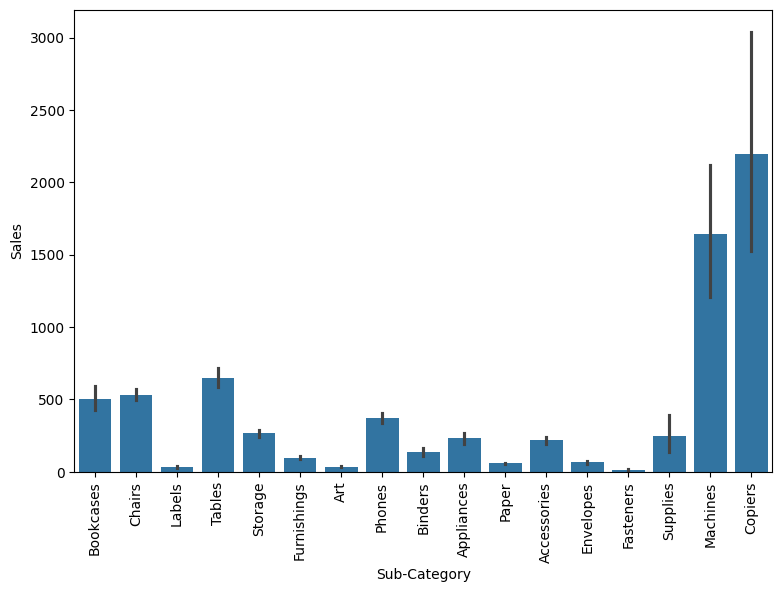

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,6))
sns.barplot(x='Sub-Category',y='Sales',data=df)
plt.xticks(rotation=90)
plt.show()


#**Interpretation for Bar Chart**.

**Highest Sales:** The "Copiers" and "Machines" sub-categories stand out with the highest sales figures. These categories are significantly outperforming other sub-categories in terms of revenue.

**Moderate Sales:** Sub-categories like "Tables" and "Phones" have moderate sales, indicating that they contribute decently to overall revenue, though not as much as "Copiers" and "Machines".

**Lowest Sales:** "Labels" and "Fasteners" exhibit the lowest sales among all sub-categories. These might be niche products or less popular among customers, contributing minimally to the overall revenue.

# **Which customer segment that contribute to the highest sales?**

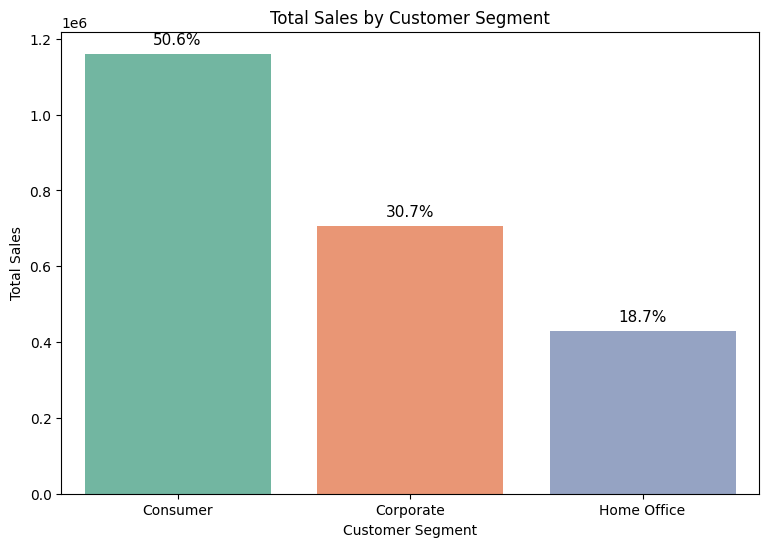

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate sales percentages
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()
segment_sales['Percentage'] = (segment_sales['Sales'] / segment_sales['Sales'].sum()) * 100

# Plot bar plot
plt.figure(figsize=(9, 6))
barplot = sns.barplot(x='Segment', y='Sales', data=segment_sales, palette='Set2')

# Add percentages on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height() / segment_sales["Sales"].sum() * 100:.1f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='black', xytext=(0, 10),
                     textcoords='offset points')

plt.title('Total Sales by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Total Sales')
plt.show()



# **Interpretation**
###From the bar plot, the Consumer segment contributes the most to the total sales in the superstore, making up approximately 50.6% of the total sales. The Corporate segment follows with 30.7%, while the Home Office segment accounts for 18.7%.

# **Calculate Sales Per Category**

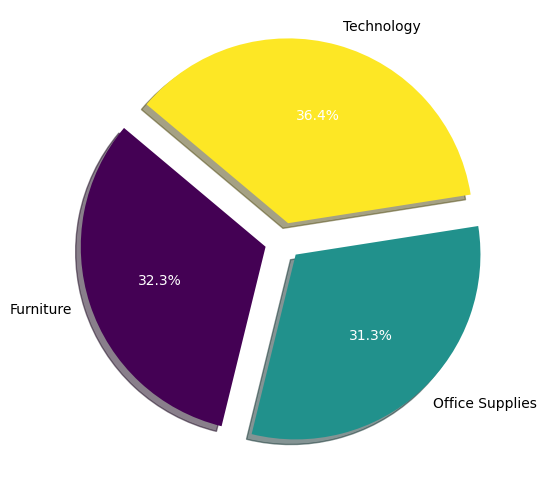

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate sales per category
sales = df.groupby('Category')['Sales'].sum()

# Define the Viridis color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(sales)))

plt.figure(figsize=(9,6))

# Create the pie chart with Viridis colors
_, _, autotexts = plt.pie(
    sales,
    labels=sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    shadow=True,
    explode=[0.1] * len(sales)
)

# Highlight percentage labels in white
for autotext in autotexts:
    autotext.set_color('white')

plt.ylabel('')  # Hide the y-label as it's not needed for a pie chart
plt.show()



# **Interpretation**
###The pie chart shows the distribution of sales across three product categories: Technology, Furniture, and Office Supplies.

**Technology** is the largest category, accounting for 36.4% of sales.
**Furniture** is the second largest category, representing 32.3% of sales.
**Office Supplies** is the smallest category, with 31.3% of sales.
Overall, the pie chart indicates that Technology is the most popular product category, followed closely by Furniture and Office Supplies

# **Which region, state and city contribute to the highest sales?**

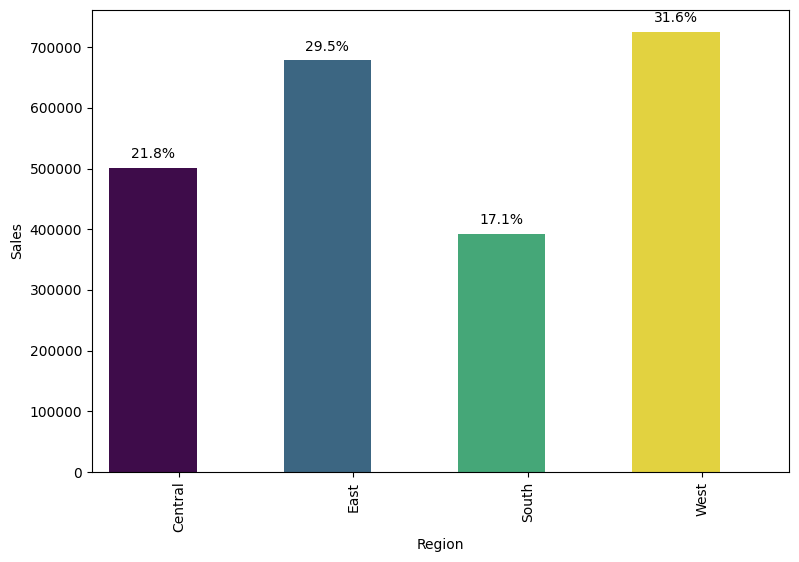

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate sales per region
sales = df.groupby('Region')['Sales'].sum()

# Define the color palette
colors = plt.cm.viridis(np.linspace(0, 1, len(sales)))

plt.figure(figsize=(9,6))

# Create the bar plot
ax = sns.barplot(x=sales.index, y=sales, palette=colors)

# Adjust bar width (this method requires accessing patches from Matplotlib)
for bar in ax.patches:
    bar.set_width(0.5)  # Adjust bar width here

plt.xticks(rotation=90)

# Add percentage labels above each bar
total_sales = sales.sum()
for p in ax.patches:
    percentage = (p.get_height() / total_sales) * 100
    ax.annotate(f'{percentage:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                color='black')

plt.show()


# **Interpretation for Region**
**West** is the region with the highest sales, accounting for 31.6% of the total sales.
**East** is the second highest-performing region with 29.5% of the sales.
**Central and South** have relatively lower sales, with 21.8% and 17.1% respectively.
Overall, the bar chart indicates that the West region is the most successful in terms of sales, while the South region has the lowest sales performance

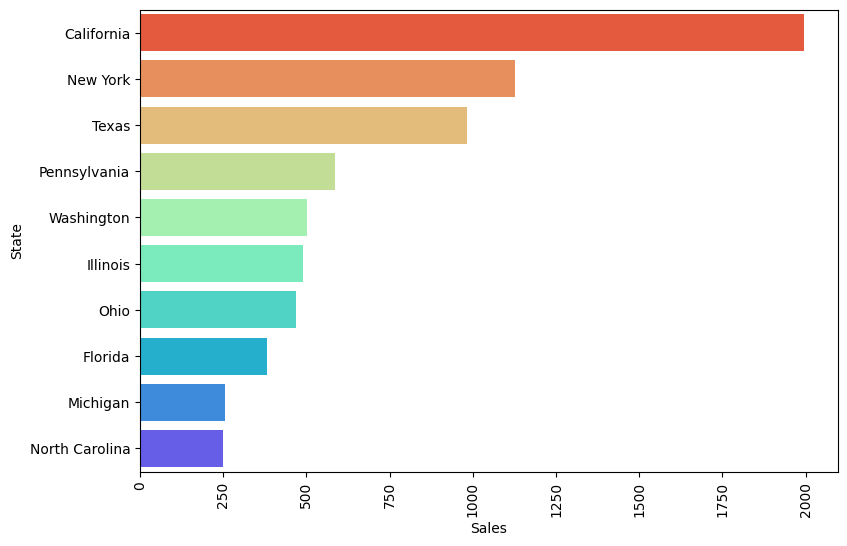

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 states by count
top_10_states = df['State'].value_counts().nlargest(10).reset_index()
top_10_states.columns = ['State', 'Sales']

plt.figure(figsize=(9,6))

# Create the bar plot for the top 10 states
sns.barplot(y='State', x='Sales', data=top_10_states, palette='rainbow_r')

plt.xticks(rotation=90)
plt.show()




# **Interpretation for State**

###"The Bar plot shows sales by state, highlighting the top 10 states where California contributes the highest sales to the Superstore."

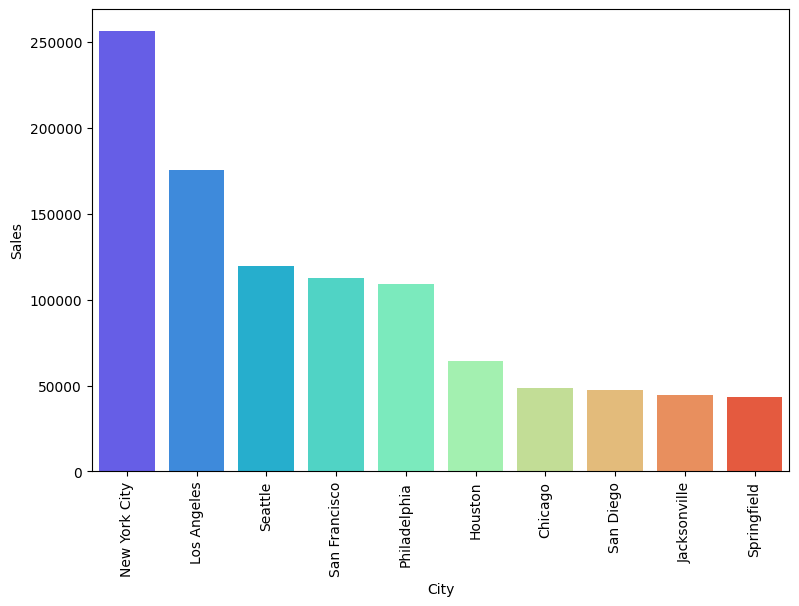

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the top 10 cities by sales
top_10_cities = df.groupby('City')['Sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(9,6))

# Create the bar plot for the top 10 cities
sns.barplot(x='City', y='Sales', data=top_10_cities, palette='rainbow')

plt.xticks(rotation=90)
plt.show()



# **Interpretation for City**
###The barplot shows sales by city, highlighting the top 10 city where New York city contributes the highest sales to the Superstore.

# **Correlation Matrix**

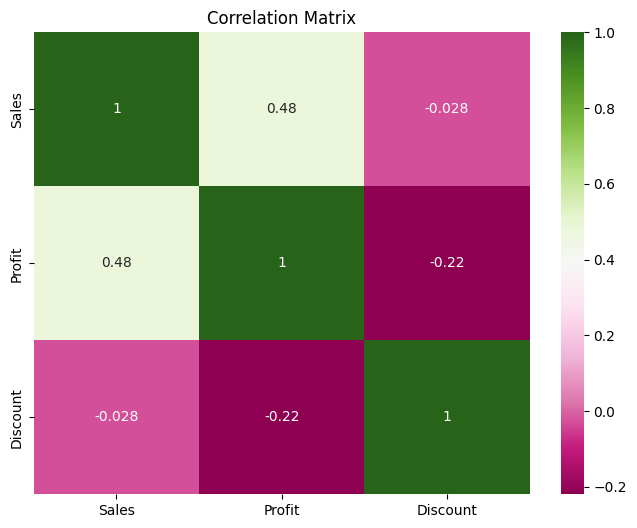

In [19]:
correlation_matrix = df[['Sales', 'Profit', 'Discount']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.title('Correlation Matrix')
plt.show()


# **Interpretation**
**Sales vs. Profit:** -Moderate Positive Correlation (0.48): As sales increase, profits generally rise.

**Sales vs. Discount:**-Very Weak Negative Correlation (-0.028): Discounts have minimal impact on sales.

**Profit vs. Discount:**-Weak Negative Correlation (-0.22): Higher discounts slightly reduce profits.

# **Segmentation**

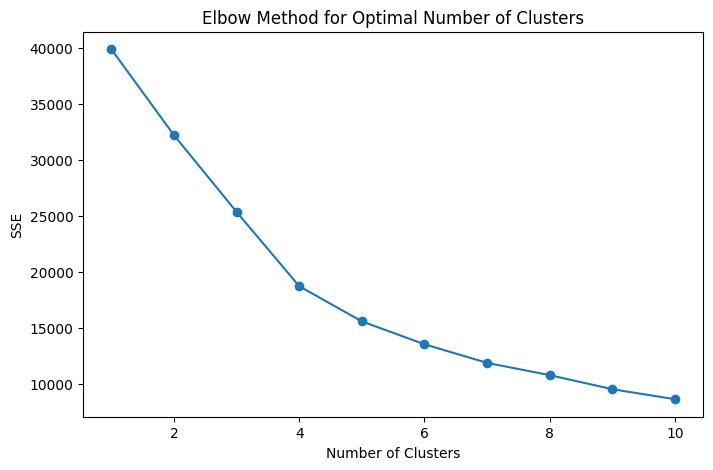

              Sales                    Profit               Quantity  \
               mean           sum        mean          sum      mean   
Segment                                                                
0        123.114751  8.487531e+05   20.727445  142895.0059  2.834494   
1        159.030364  1.696854e+05 -106.886739 -114048.1504  3.822868   
2        633.808085  1.277757e+06  127.675877  257394.5671  7.043651   

         Discount       Segment  
             mean Num_Customers  
Segment                          
0        0.095348          6894  
1        0.661809          1067  
2        0.097078          2016  


In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Select relevant features for clustering
features = df[['Sales', 'Profit', 'Quantity', 'Discount']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Choose an optimal number of clusters (e.g., 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
cluster_analysis = df.groupby('Segment').agg({
    'Sales': ['mean', 'sum'],
    'Profit': ['mean', 'sum'],
    'Quantity': 'mean',
    'Discount': 'mean',
    'Segment': 'count'
}).rename(columns={'count': 'Num_Customers'})

# Display the cluster analysis
print(cluster_analysis)

# Visualize the clusters
#sns.pairplot(df, hue='Segment', vars=['Sales', 'Profit', 'Quantity', 'Discount'])
#plt.show()



### **Interpretation**

The analysis resulted in three distinct customer segments, as identified by the K-means clustering algorithm. Here's a breakdown of the characteristics of each segment:

1. **Segment 0 (Majority of Customers)**:
- **Average Sales**: 123.11
- **Total Sales**: $848,753.10   

- **Average Profit**: $20.73

- **Total Profit**: $142,895.01
- **Average Quantity**: 2.83
- **Average Discount**: 9.53%
- **Number of Customers**: 6,894
   

   **Key Insights**:
   - This is the largest segment, with 6,894 customers.
   - Customers in this segment generate moderate sales and profit, with a relatively low discount rate.
   - This segment likely represents regular consumers who purchase a few items at a time and contribute positively to profitability.

2. **Segment 1 (Discount-Oriented Customers)**:
- **Average Sales**: $159.03

- **Total Sales**: $169,685.40

- **Average Profit**: -$106.89 (Negative)

- **Total Profit**: -$114,048.15 (Negative)
- **Average Quantity**: 3.82
- **Average Discount**: 66.18%
- **Number of Customers**: 1,067
   
**Key Insights**:
   - This segment is characterized by a high discount rate (66.18% on average) and negative profitability.
   - Although the average sales per transaction are higher than Segment 0, the high discounts lead to negative profits.
   - This segment may represent price-sensitive customers who only purchase during sales or promotions, and are not profitable for the business.

3. **Segment 2 (High-Value Customers)**:
- **Average Sales**: $633.81

- **Total Sales**: $1,277,757.00

- **Average Profit**: $127.68

- **Total Profit**: $257,394.57
- **Average Quantity**: 7.04
- **Average Discount**: 9.71%
- **Number of Customers**: 2,016
   
**Key Insights**:
   - This segment represents high-value customers, with significantly higher average sales and profit per transaction compared to the other segments.
   - Despite the higher average quantity of items purchased, the discount rate remains low, leading to substantial profitability.
   

### Conclusion:
- **Segment 0** is the largest and contributes steadily to sales and profit.
- **Segment 1** is unprofitable due to deep discounts and could be targeted differently .
- **Segment 2** is the most profitable.



# **Segment 0**

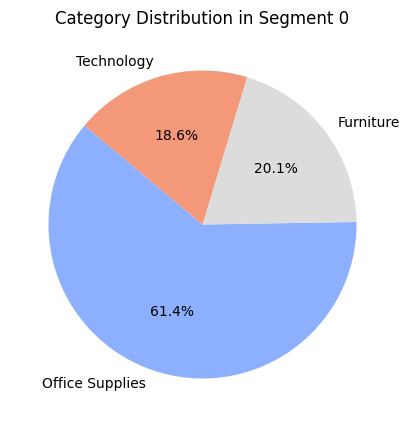

In [21]:
import pandas as pd
import matplotlib.pyplot as plt



# Assuming the data already has the 'Segment' column from the previous K-means clustering
# Filter the data to include only Segment 0
segment_0 = df[df['Segment'] == 0]

# Calculate the distribution of the 'Category' within Segment 0
category_distribution = segment_0['Category'].value_counts()

# Plot a pie chart for Segment 0
plt.figure(figsize=(5, 5))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(category_distribution)))
plt.title('Category Distribution in Segment 0')
plt.show()


Customers in Segment 0 are predominantly purchasing Office Supplies(61%), with a smaller focus on Furniture(20%) and an even lesser emphasis on Technology(18%).

# **Segment 1**

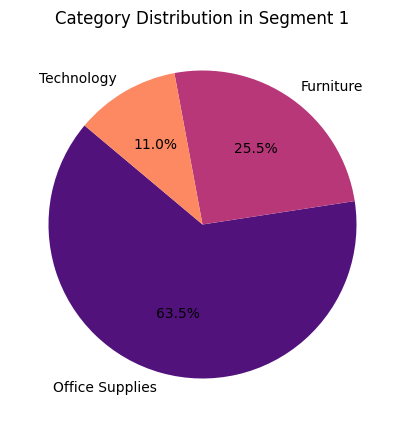

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the data to include only Segment 1
segment_1 = df[df['Segment'] == 1]

# Calculate the distribution of the 'Category' within Segment 1
category_distribution = segment_1['Category'].value_counts()

# Plot a pie chart for Segment 1
plt.figure(figsize=(5, 5))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('magma', len(category_distribution)))
plt.title('Category Distribution in Segment 1')
plt.show()


Customers in Segment 1 are predominantly purchasing Office Supplies(63%), with a smaller focus on Furniture (25%) and an even lesser emphasis on Technology(11%).

# **Segment 2**

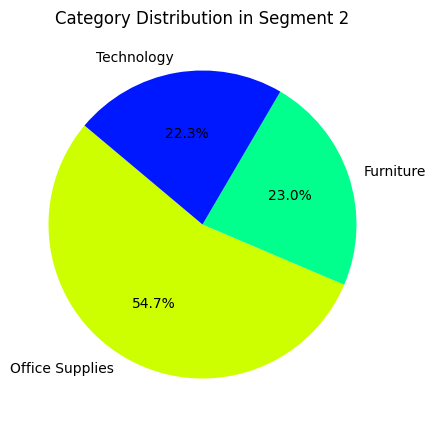

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Filter the data to include only Segment 2
segment_2 = df[df['Segment'] == 2]

# Calculate the distribution of the 'Category' within Segment 2
category_distribution = segment_2['Category'].value_counts()

# Plot a pie chart for Segment 2
plt.figure(figsize=(5, 5))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('gist_rainbow', len(category_distribution)))
plt.title('Category Distribution in Segment 2')
plt.show()


Customers in Segment 2 are primarily purchasing Office Supplies(54%), followed by Furniture(23%) and Technology(22%), which may suggest that this segment consists of businesses or individuals focused on office-related products.